In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [3]:
import pandas as pd

# Đọc tệp CSV từ URL
url = 'https://raw.githubusercontent.com/Tuan3198263/CT312/main/car_insurance_data.csv'
df = pd.read_csv(url)

df.head()


,AGE,SEX,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,0,0,0,3,0.629027,1.0,1,0.0,1.0,0.0,12000.0,0,0.0,0,0,0
1,0,1,0,0,2,0,0.357757,0.0,0,0.0,0.0,0.0,16000.0,0,0.0,0,0,1
2,0,0,0,0,0,1,0.493146,1.0,0,0.0,0.0,0.0,11000.0,0,0.0,0,0,0
3,0,1,0,0,1,1,0.206013,1.0,0,0.0,1.0,1.0,11000.0,0,0.0,0,0,0
4,1,1,0,1,2,1,0.388366,1.0,0,0.0,0.0,1.0,12000.0,0,2.0,0,1,1


In [ ]:
df[:10]

,AGE,SEX,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,0,0,0,3,0.629027,1.0,1,0.0,1.0,0.0,12000.0,0,0.0,0,0,0
1,0,1,0,0,2,0,0.357757,0.0,0,0.0,0.0,0.0,16000.0,0,0.0,0,0,1
2,0,0,0,0,0,1,0.493146,1.0,0,0.0,0.0,0.0,11000.0,0,0.0,0,0,0
3,0,1,0,0,1,1,0.206013,1.0,0,0.0,1.0,1.0,11000.0,0,0.0,0,0,0
4,1,1,0,1,2,1,0.388366,1.0,0,0.0,0.0,1.0,12000.0,0,2.0,0,1,1
5,2,0,0,2,0,3,0.619127,1.0,1,0.0,1.0,0.0,13000.0,0,3.0,0,3,0
6,3,1,0,3,0,3,0.492944,0.0,1,1.0,1.0,0.0,13000.0,0,7.0,0,3,0
7,1,0,0,0,1,1,0.468689,0.0,1,0.0,1.0,0.0,14000.0,0,0.0,0,0,1
8,2,0,0,2,1,1,0.521815,0.0,0,1.0,0.0,0.0,13000.0,0,0.0,0,0,0
9,2,0,0,0,0,3,0.561531,1.0,0,0.0,1.0,1.0,11000.0,0,0.0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9998 non-null   int64  
 1   SEX                  9998 non-null   int64  
 2   RACE                 9998 non-null   int64  
 3   DRIVING_EXPERIENCE   9998 non-null   int64  
 4   EDUCATION            9998 non-null   int64  
 5   INCOME               9998 non-null   int64  
 6   CREDIT_SCORE         9998 non-null   float64
 7   VEHICLE_OWNERSHIP    9998 non-null   float64
 8   VEHICLE_YEAR         9998 non-null   int64  
 9   MARRIED              9998 non-null   float64
 10  CHILDREN             9998 non-null   float64
 11  POSTAL_CODE          9998 non-null   float64
 12  ANNUAL_MILEAGE       9998 non-null   float64
 13  VEHICLE_TYPE         9998 non-null   int64  
 14  SPEEDING_VIOLATIONS  9998 non-null   float64
 15  DUIS                 9998 non-null   i

In [4]:


def plot_confusion_matrix(y_true, y_pred, labels=None):
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Vẽ ma trận nhầm lẫn
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.xlabel("Dự đoán")
    plt.ylabel("Thực tế")
    plt.show()

    return cm


Dùng HoldOut chia tập dữ liệu

In [5]:

# Tách các đặc trưng và nhãn
X = df.drop('OUTCOME', axis=1)  # Tất cả các cột ngoại trừ cột OUTCOME
y = df['OUTCOME']  # Cột OUTCOME

#Hold-out 75-25
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




Chuẩn hóa MinMax

In [6]:


# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Huấn luyện trên các mô hình**


KNN:
Accuracy: 0.8168
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1729
           1       0.73      0.64      0.68       771

    accuracy                           0.82      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.81      0.82      0.81      2500



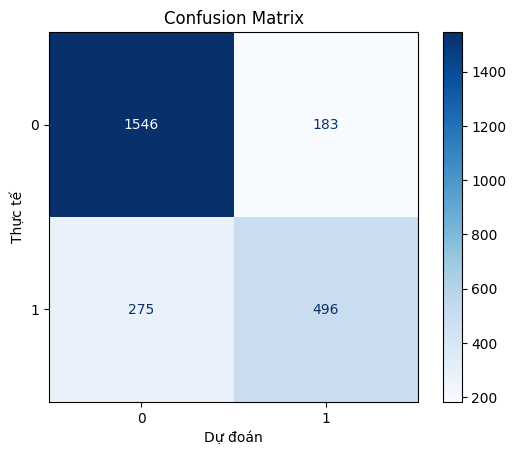

array([[1546,  183],
       [ 275,  496]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=15)  # Số lượng láng giềng
knn.fit(X_train_scaled, y_train)

# Dự đoán với mô hình KNN
y_pred_knn = knn.predict(X_test_scaled)

# Đánh giá mô hình
print("\nKNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
plot_confusion_matrix(y_test, y_pred_knn, labels=[0, 1])


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8472949077162554

Decision Tree:
Accuracy: 0.8432
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1729
           1       0.77      0.70      0.73       771

    accuracy                           0.84      2500
   macro avg       0.82      0.80      0.81      2500
weighted avg       0.84      0.84      0.84      2500



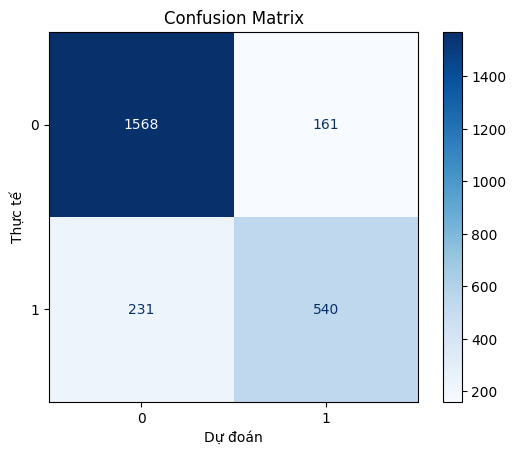

array([[1568,  161],
       [ 231,  540]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Định nghĩa mô hình Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Xác định các tham số để điều chỉnh
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Sử dụng GridSearchCV để tìm tham số tốt nhất
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Huấn luyện mô hình với GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# In ra tham số tốt nhất và độ chính xác
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Dự đoán với mô hình Decision Tree đã tối ưu hóa
y_pred_tree = grid_search.predict(X_test_scaled)

# Đánh giá mô hình
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Áp dụng ma trận nhầm lẫn
plot_confusion_matrix(y_test, y_pred_tree, labels=[0, 1])



Logistic Regression:
Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1729
           1       0.77      0.71      0.74       771

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



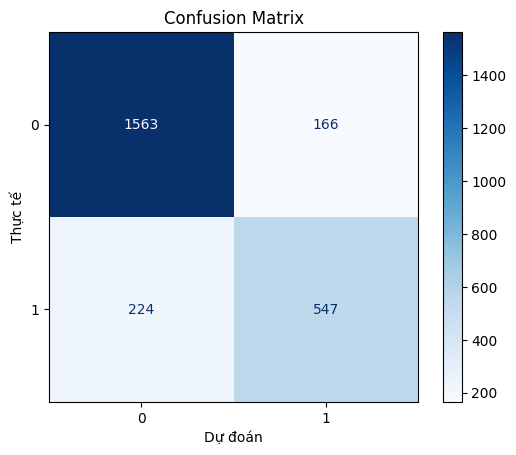

array([[1563,  166],
       [ 224,  547]])

In [ ]:
from sklearn.linear_model import LogisticRegression

# Huấn luyện mô hình Hồi quy Logistic
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Dự đoán với mô hình Hồi quy Logistic
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Đánh giá mô hình
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

# Áp dụng ma trận nhầm lẫn
plot_confusion_matrix(y_test, y_pred_logistic, labels=[0, 1])


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation accuracy: 0.8486268107242897

Random Forest:
Accuracy: 0.8448
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1729
           1       0.76      0.72      0.74       771

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.82      2500
weighted avg       0.84      0.84      0.84      2500



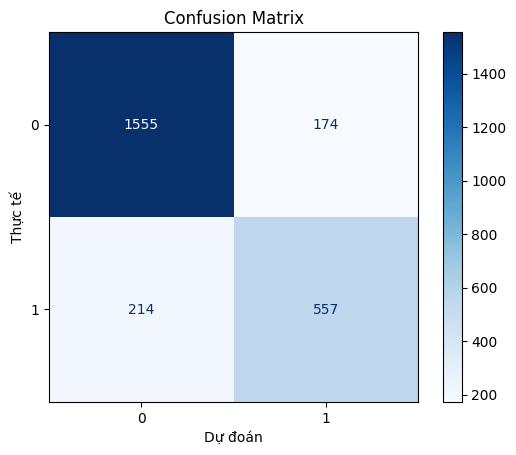

array([[1555,  174],
       [ 214,  557]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Định nghĩa mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Xác định các tham số để điều chỉnh với ít giá trị hơn
param_grid = {
    'n_estimators': [50, 100],  # Giảm số lượng cây để kiểm tra
    'max_depth': [None, 10, 20]  # Giảm độ sâu cây để kiểm tra
}

# Sử dụng GridSearchCV để tìm tham số tốt nhất
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Huấn luyện mô hình với GridSearchCV
grid_search_rf.fit(X_train_scaled, y_train)

# In ra tham số tốt nhất và độ chính xác
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation accuracy:", grid_search_rf.best_score_)

# Dự đoán với mô hình Random Forest đã tối ưu hóa
y_pred_rf = grid_search_rf.predict(X_test_scaled)

# Đánh giá mô hình
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Áp dụng ma trận nhầm lẫn
plot_confusion_matrix(y_test, y_pred_rf, labels=[0, 1])


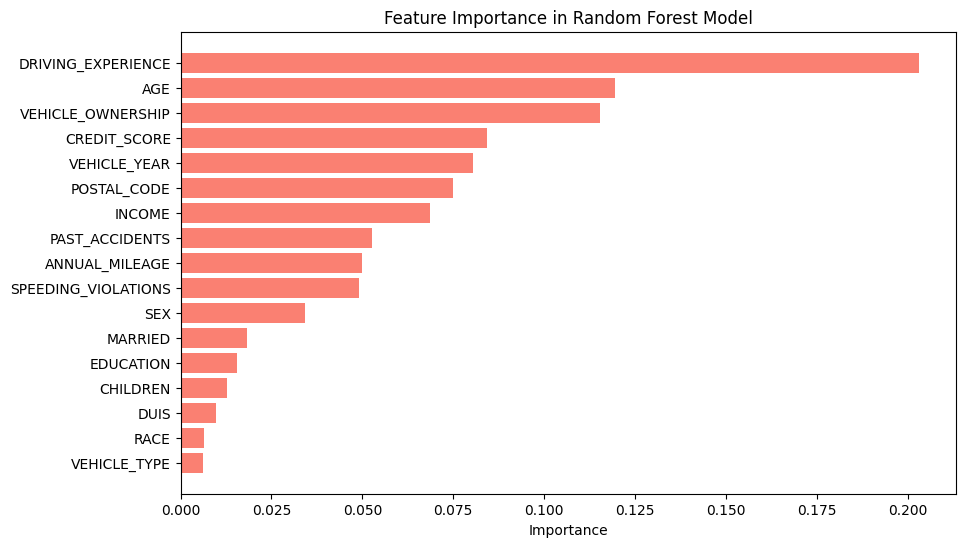

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Lấy danh sách các đặc trưng và mức độ quan trọng của chúng từ mô hình đã huấn luyện
feature_importances_rf = grid_search_rf.best_estimator_.feature_importances_

# Tạo DataFrame để dễ dàng sắp xếp và trực quan hóa
feature_importances_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sắp xếp các đặc trưng theo mức độ quan trọng
feature_importances_rf_df = feature_importances_rf_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf_df['Feature'], feature_importances_rf_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Đảo ngược trục y để đặc trưng quan trọng nhất nằm ở trên cùng
plt.show()


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation accuracy: 0.8506270241429905

AdaBoost:
Accuracy: 0.8504
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1729
           1       0.79      0.71      0.74       771

    accuracy                           0.85      2500
   macro avg       0.83      0.81      0.82      2500
weighted avg       0.85      0.85      0.85      2500



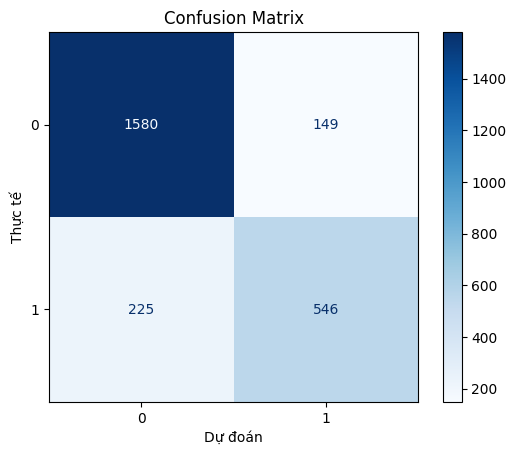

array([[1580,  149],
       [ 225,  546]])

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Định nghĩa mô hình AdaBoost
ada_model = AdaBoostClassifier(random_state=42)

# Xác định các tham số để điều chỉnh
param_grid = {
    'n_estimators': [50, 100, 200],  # Số lượng cây cơ sở
    'learning_rate': [0.01, 0.1, 1.0]  # Tốc độ học
}

# Sử dụng GridSearchCV để tìm tham số tốt nhất
grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid,
                                scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Huấn luyện mô hình với GridSearchCV
grid_search_ada.fit(X_train_scaled, y_train)

# In ra tham số tốt nhất và độ chính xác
print("Best parameters:", grid_search_ada.best_params_)
print("Best cross-validation accuracy:", grid_search_ada.best_score_)

# Dự đoán với mô hình AdaBoost đã tối ưu hóa
y_pred_ada = grid_search_ada.predict(X_test_scaled)

# Đánh giá mô hình
print("\nAdaBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

# Áp dụng ma trận nhầm lẫn
plot_confusion_matrix(y_test, y_pred_ada, labels=[0, 1])  # Gọi hàm ma trận nhầm lẫn đã định nghĩa


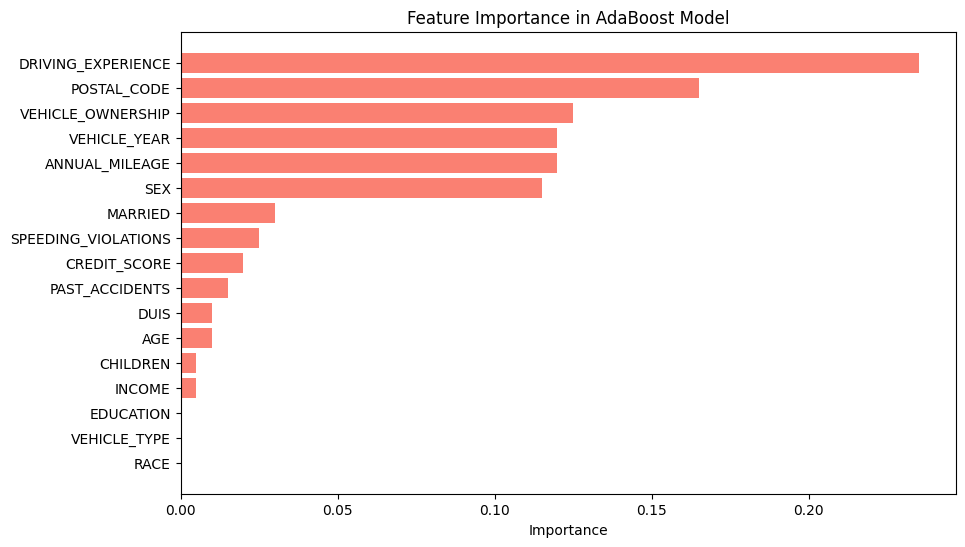

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Lấy danh sách các đặc trưng và mức độ quan trọng của chúng từ mô hình AdaBoost đã tối ưu
feature_importances_ada = grid_search_ada.best_estimator_.feature_importances_

# Tạo DataFrame để sắp xếp và dễ dàng trực quan hóa
feature_importances_ada_df = pd.DataFrame({
    'Feature': X_train.columns,  # Giả định rằng X_train có tên các cột là các đặc trưng
    'Importance': feature_importances_ada
})

# Sắp xếp các đặc trưng theo mức độ quan trọng
feature_importances_ada_df = feature_importances_ada_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_ada_df['Feature'], feature_importances_ada_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.title('Feature Importance in AdaBoost Model')
plt.gca().invert_yaxis()  # Đảo ngược trục y để đặc trưng quan trọng nhất nằm ở trên cùng
plt.show()


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation accuracy: 0.8516942777110844

Gradient Boosting:
Accuracy: 0.8496
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1729
           1       0.77      0.74      0.75       771

    accuracy                           0.85      2500
   macro avg       0.83      0.82      0.82      2500
weighted avg       0.85      0.85      0.85      2500



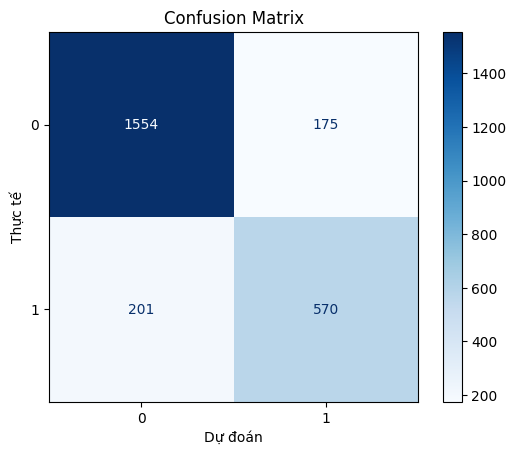

array([[1554,  175],
       [ 201,  570]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Định nghĩa mô hình Gradient Boosting
gbm_model = GradientBoostingClassifier(random_state=42)

# Xác định các tham số để điều chỉnh
param_grid = {
    'n_estimators': [100, 200],  # Số lượng cây
    'learning_rate': [0.01, 0.1, 0.2],  # Tốc độ học
    'max_depth': [3, 5, 7]  # Độ sâu tối đa của cây
}

# Sử dụng GridSearchCV để tìm tham số tốt nhất
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid,
                                scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Huấn luyện mô hình với GridSearchCV
grid_search_gbm.fit(X_train_scaled, y_train)

# In ra tham số tốt nhất và độ chính xác
print("Best parameters:", grid_search_gbm.best_params_)
print("Best cross-validation accuracy:", grid_search_gbm.best_score_)

# Dự đoán với mô hình Gradient Boosting đã tối ưu hóa
y_pred_gbm = grid_search_gbm.predict(X_test_scaled)

# Đánh giá mô hình
print("\nGradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

# Áp dụng ma trận nhầm lẫn
plot_confusion_matrix(y_test, y_pred_gbm, labels=[0, 1])  # Gọi hàm ma trận nhầm lẫn đã định nghĩa


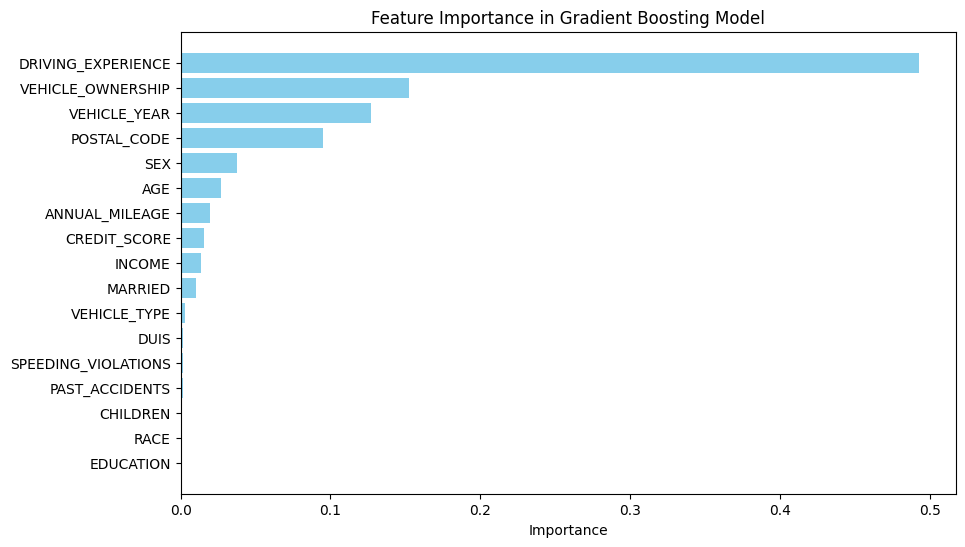

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Lấy danh sách các đặc trưng và mức độ quan trọng của chúng từ mô hình gbm đã huấn luyện
feature_importances = grid_search_gbm.best_estimator_.feature_importances_

# Tạo DataFrame để dễ dàng sắp xếp và trực quan hóa
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sắp xếp các đặc trưng theo mức độ quan trọng
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.gca().invert_yaxis()  # Đảo ngược trục y để đặc trưng quan trọng nhất nằm ở trên cùng
plt.show()


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 2362, number of negative: 5136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7498, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.315017 -> initscore=-0.776766
[LightGBM] [Info] Start training from score -0.776766
Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'num_leaves': 31}
Best cross-validation accuracy: 0.853161157796452

LightGBM:
Accuracy: 0.8516
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1729
           1       0.76      0.76      0.76       771

    accuracy                           0.85      2500
   macro avg       0.83      0.83      0.83      2500

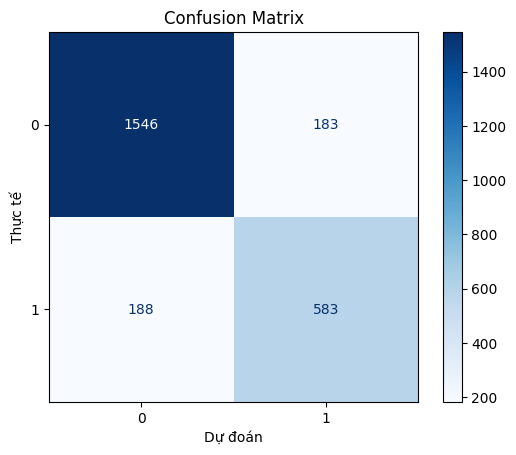

array([[1546,  183],
       [ 188,  583]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Định nghĩa mô hình LightGBM
lgbm_model = LGBMClassifier(random_state=42)

# Xác định các tham số để điều chỉnh
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Sử dụng GridSearchCV để tìm tham số tốt nhất
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Huấn luyện mô hình với GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# In ra tham số tốt nhất và độ chính xác
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Dự đoán với mô hình LightGBM đã tối ưu hóa
y_pred_lgbm = grid_search.predict(X_test_scaled)

# Đánh giá mô hình
print("\nLightGBM:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

# Áp dụng ma trận nhầm lẫn
plot_confusion_matrix(y_test, y_pred_lgbm, labels=[0, 1])


In [12]:
import pandas as pd

# Tạo một DataFrame để lưu trữ các kết quả
results = pd.DataFrame({
    'Model': ['KNN', 'D Tree' , 'R Forest', 'AdaBoost', 'GBM'],
    'Accuracy': [0.82, 0.84, 0.85, 0.85, 0.85],

})

print(results)


      Model  Accuracy
0       KNN      0.82
1    D Tree      0.84
2  R Forest      0.85
3  AdaBoost      0.85
4       GBM      0.85


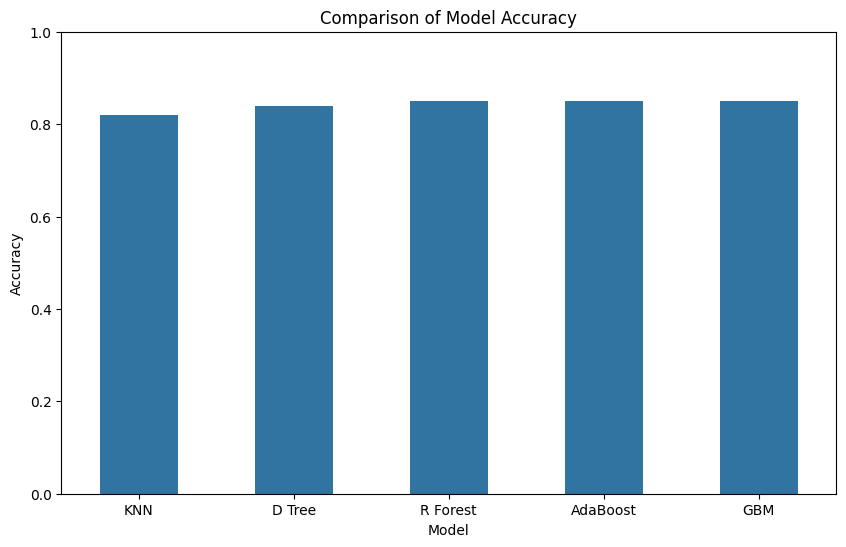

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ thanh cho Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results, width= 0.5)
plt.title('Comparison of Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.show()

In [ ]:
import joblib

# Lưu mô hình
joblib.dump(grid_search_ada, 'ada_model.pkl')

# Để tải lại mô hình
loaded_model = joblib.load('ada_model.pkl')

# Sử dụng mô hình đã tải
y_pred_loaded = loaded_model.predict(X_test_scaled)
print("Accuracy of loaded model:", accuracy_score(y_test, y_pred_loaded))


Accuracy of loaded model: 0.8504
